# **Laboratório: Métodos Contraceptivos**
*Prof. Dr. Orlando Junior*

A concepção é a ação de gerar um outro ser vivo. Logo, a **contracepção** é a maneira de evitar que isso ocorra, sendo os métodos contraceptivos uma importante ferramenta para evitar a gravidez, de maneira temporária ou não.

Os métodos desse controle incluem medicamentos, procedimentos, dispositivos e comportamentos, auxiliando também cada pessoa a colocar em prática o seu direito reprodutivo. Entre os métodos contraceptivos, existem aqueles que são hormonais e não hormonais.

Os anticoncepcionais que contêm hormônios são aqueles que agem inibindo a ovulação da mulher e/ou provocando alterações nas características do muco que é expelido pela vagina, dificultando a passagem dos espermatozoides. Já os não hormonais são aqueles que não contam com hormônios em sua composição. Além disso, os métodos podem ser classificados por seu período de ação, como:

* De curta duração: são métodos que precisam ser administrados com mais frequência, seja diariamente, mensalmente ou a cada três meses (trimestral).

* De longa duração: são métodos com uma duração que pode variar de 3 a 10 anos, a depender da escolha.

* Permanentes: são métodos realizados por meio de procedimentos cirúrgicos, que visam a impedir a fertilização e são irreversíveis.

![picture](https://media.graphassets.com/N4QGN8OGRfyzw5JC6CTd)

Neste laboratório de **Ciência de Dados**, você irá analisar uma base de dados que é um subconjunto da Pesquisa Nacional de Prevalência de Contraceptivos da Indonésia, de 1987. As amostras são mulheres casadas que não estavam grávidas ou não sabiam se estavam grávidas no momento da entrevista. O problema é identificar o tipo de método contraceptivo utilizado por uma mulher com base em suas características demográficas e socioeconômicas.

No arquivo de dados que você está recebendo, você irá observar 1473 amostras e 9 atributos, sendo eles, em ordem:

1. Idade da mulher - numérico
2. Educação da mulher - categórico - {1=baixo, 2, 3, 4=alto}
3. Educação do marido - categórico  - {1=baixo, 2, 3, 4=alto}
4. Número de crianças já nascidas - numérico
5. Religião - binário - {0=Não Islã, 1=Islã}
6. A esposa está trabalhando no momento? - binário - {0=Sim, 1=Não}
7. Ocupação do marido - categórico - {1, 2, 3, 4}
8. índice de padrão de vida - categórico - {1=baixo, 2, 3, 4=alto}
9. Exposição na mídia - binário - {0=Bom, 1=Não é bom}
10. Identificador da mulher

## Laboratório

**Anthony Lima Campelo** --- RA: *10442330 *

### Bibliotecas

In [1]:
!pip install apyori

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from apyori import apriori

### Leitura de Dados

In [3]:
df = pd.read_csv("dataSet's\contraceptive.csv", sep=',',
                         names=['Idade', 'Educação Mulher', 'Educação Marido', 'N Crianças Nascidas','Religião','Trabalha?','Trab Marido','Pd Vida', 'Exposição', 'Identificador'])

In [4]:
df_nominais = df.loc[0:,('Educação Mulher','Educação Marido','Trab Marido','Pd Vida')]
df_nominais

df_numericos = df.loc[0:,('Idade', 'N Crianças Nascidas')]
df_numericos


,Idade,N Crianças Nascidas
0,24,3
1,45,10
2,43,7
3,42,9
4,36,8
...,...,...
1468,33,2
1469,33,3
1470,39,8
1471,33,4


### Tratamento de Dados

**Tratamento de Dados Categóricos Nominais**

In [5]:
registros = []

for i in range(0, df_nominais.shape[0]):
    registros.append([str(df.values[i, j]) for j in range(0, df.shape[1])])

registros[3:10]

[['42', '3', '2', '9', '1', '1', '3', '3', '0', '4'],
 ['36', '3', '3', '8', '1', '1', '3', '2', '0', '5'],
 ['19', '4', '4', '0', '1', '1', '3', '3', '0', '6'],
 ['38', '2', '3', '6', '1', '1', '3', '2', '0', '7'],
 ['21', '3', '3', '1', '1', '0', '3', '2', '0', '8'],
 ['27', '2', '3', '3', '1', '1', '3', '4', '0', '9'],
 ['45', '1', '1', '8', '1', '1', '2', '2', '1', '10']]

**Tratamento de Dados Numéricos**

In [6]:


scaler = StandardScaler()
print(scaler.fit(df_numericos))
StandardScaler()
print(scaler.mean_)
df_numericos_ = scaler.transform(df_numericos)



StandardScaler()
[32.53835709  3.26137135]


**Integração de Dados**

In [7]:
df_nominais = df_nominais.merge(df_numericos, how='inner', left_index=True,  right_index=True)

df_nominais

,Educação Mulher,Educação Marido,Trab Marido,Pd Vida,Idade,N Crianças Nascidas
0,2,3,2,3,24,3
1,1,3,3,4,45,10
2,2,3,3,4,43,7
3,3,2,3,3,42,9
4,3,3,3,2,36,8
...,...,...,...,...,...,...
1468,4,4,2,4,33,2
1469,4,4,1,4,33,3
1470,3,3,1,4,39,8
1471,3,3,2,2,33,4


### Aprendizagem e Avaliação

**Treinamento**

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, init='random', n_init='auto', random_state=42, verbose=1)
kmeans.fit(df_numericos_) # Ajusta um modelo aos dados

Initialization complete
Iteration 0, inertia 1522.0645606643734.
Iteration 1, inertia 1137.4563013294728.
Iteration 2, inertia 1092.927549569678.
Iteration 3, inertia 1058.4436989488715.
Iteration 4, inertia 1019.1642245700439.
Iteration 5, inertia 988.499816799759.
Iteration 6, inertia 972.8925301041002.
Iteration 7, inertia 963.1702698505576.
Iteration 8, inertia 959.2587490454896.
Iteration 9, inertia 956.2945661263948.
Iteration 10, inertia 952.0674807042122.
Iteration 11, inertia 950.3033616299278.
Iteration 12, inertia 949.1063901695063.
Converged at iteration 12: center shift 6.170212255861906e-05 within tolerance 0.00010000000000000022.
Initialization complete
Iteration 0, inertia 2181.0257444921062.
Iteration 1, inertia 1363.9075922522052.
Iteration 2, inertia 1248.4529015837752.
Iteration 3, inertia 1175.7759656054172.
Iteration 4, inertia 1108.031206040696.
Iteration 5, inertia 1033.0207892458016.
Iteration 6, inertia 990.1391191181879.
Iteration 7, inertia 968.5852065606389

KMeans(init='random', n_clusters=3, n_init='auto', random_state=42, verbose=1)

In [9]:
regras = apriori(registros, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [10]:
print("Centróide 1º cluster: ", kmeans.cluster_centers_[0])
print("Centróide 2º cluster: ", kmeans.cluster_centers_[1])
print("Centróide 3º cluster: ", kmeans.cluster_centers_[2])

Centróide 1º cluster:  [ 0.57177293 -0.04661715]
Centróide 2º cluster:  [1.01650469 1.61180187]
Centróide 3º cluster:  [-0.91507991 -0.64608801]


**Avaliação pelo Cotovelo**

In [11]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='random', n_init='auto', random_state=42)
    kmeans.fit(df_numericos_)
    wcss.append(kmeans.inertia_)

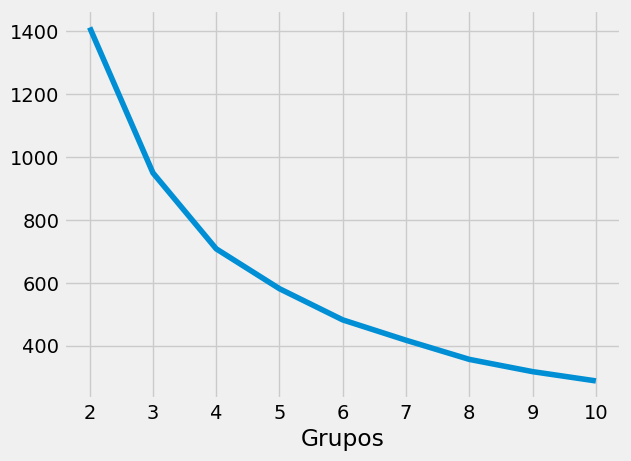

In [12]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11))
plt.xlabel("Grupos")
plt.show()

**Avaliação pela Silhueta**

In [13]:
silhuetas = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='random', n_init='auto', random_state=42)
    kmeans.fit(df_numericos_)
    score = silhouette_score(df_numericos_, kmeans.labels_)
    silhuetas.append(score)

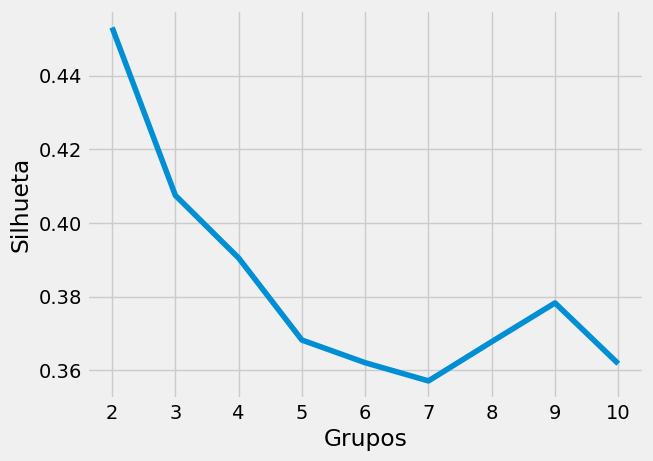

In [14]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhuetas)
plt.xticks(range(2, 11))
plt.xlabel("Grupos")
plt.ylabel("Silhueta")
plt.show()

### Análise de Negócio

**Rotulação**

In [15]:
df_numericos_

array([[-1.03816735, -0.11085635],
       [ 1.51519439,  2.85807825],
       [ 1.27201708,  1.58567771],
       ...,
       [ 0.78566246,  2.00981122],
       [ 0.05613054,  0.31327716],
       [-1.88928793, -0.95912338]])

**Interpretação dos Grupos**

In [16]:
regras = apriori(registros, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [17]:
lista_regras = list(regras)

In [18]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

In [19]:
df_resultados = pd.DataFrame(inspect(lista_regras),
                             columns = ['Antecedente', 'Consequente', 'Suporte', 'Confiança', 'Lift'])

In [20]:
df_resultados.head(10)

,Antecedente,Consequente,Suporte,Confiança,Lift
0,49,6,0.004073,0.250000,3.959677
1,49,6,0.004073,0.250000,4.281977
2,1,5,0.006110,0.281250,3.046186
3,49,6,0.004073,0.250000,4.002717
4,2,6,0.006789,0.256410,4.061208
5,36,6,0.005431,0.216216,3.424586
6,41,4,0.005431,0.228571,3.400866
7,43,5,0.004752,0.280000,3.032647
8,49,4,0.004073,0.250000,6.575893
9,1,0,0.006110,0.281250,3.211483


**Análise com a Classe**

In [21]:
import pandas as pd
classe = pd.read_csv('dataBase/contraceptive_class.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'dataBase/contraceptive_class.csv'

In [ ]:
classe.head()

In [ ]:
classe['Contraceptive'].value_counts()